# Key findings:
1. The U.S. and the U.K. lead in YouTube video views among top-trending videos.

2. Content preferences vary by country: music videos dominate in the U.S. and U.K., while entertainment videos are most popular in Canada, India, and Germany.

3. The repeated spikes in these categories suggest possible cyclic trends in content consumption

4. ost countries gain the majority of their views within the first 5 days of posting, but in the U.S. and U.K., videos continue to attract views for up to 20 days.

5. In countries like Canada, France, Germany, the U.K., and the U.S., videos posted on Fridays receive the highest views. In India, Wednesday posts generate the most views, likes, and comments.

6. Videos with titles between 30 and 70 characters tend to receive higher total views.

## Video link: https://drive.google.com/file/d/1IeMnr9aYESPoXeXwcBkhzzsA0J_MhIhI/view?usp=sharing

# 1. Introduction to the Dataset
*links: https://www.kaggle.com/datasets/datasnaek/youtube-new/data?select=CAvideos.csv*

This dataset comprises detailed records of top trending YouTube videos across ten different countries: the USA, UK, Germany, Canada, France, Russia, Mexico, South Korea, Japan, and India. The data is structured in two formats: a CSV file containing daily records of trending videos and JSON files that provide additional category information specific to each region.

## Description of the CSV Data
The CSV dataset captures the trends on YouTube, the globally recognized video-sharing platform. As reported by Variety magazine, YouTube identifies its top trending videos through a multifactorial approach that assesses user interactions, including views, shares, comments, and likes. It is important to note that these trending videos are not simply the most viewed videos of the year; rather, they represent a curated selection based on engagement metrics.

Typically, the top performers in this dataset feature music videos, such as the iconic "Gangnam Style," celebrity performances, reality TV segments, and spontaneous viral content created by everyday users. This diversity in content highlights the dynamic nature of video popularity on YouTube.

## Description of the JSON Data
In addition to the trending video records in the CSV file, the dataset includes accompanying JSON files that provide insights into the category of each video. Each JSON file corresponds to a specific country, with a field labeled category_id that varies by region. Users can retrieve video categories by locating the corresponding entry in the associated JSON data.

# 2. Data Preprocessing
As part of the data preprocessing phase, we undertook the following steps:

*   Data Reading and Parsing: We read and parsed both the CSV and JSON files to
extract relevant information.
*   Category Extraction: We specifically extracted the category data for each country from the JSON files.
*   Data Consolidation: The extracted data from all countries was merged into a unified format, with the category information stored in a designated column titled category_title.
*   Duplicate Removal: Any duplicate entries were identified and removed to ensure data integrity and uniqueness.
*   Output Generation: Finally, the processed data was exported as a TSV (tab-separated values) file for ease of use in analysis.

This structured approach to data handling ensures that the dataset is not only comprehensive but also ready for further analysis and insights into the trending video landscape on YouTube across different countries.

# 3. Data Processing

## Upload the data

In [ ]:
from google.colab import files
merged = files.upload()

Saving merged_data.tsv to merged_data.tsv


In [ ]:
import pandas as pd
df = pd.read_csv('merged_data.tsv',encoding='latin1' ,sep = '\t', engine='python')
print(df.shape)
df.head(5)

(363375, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country,category_title
0,SbOwzAl9ZfQ,17.14.11,CapÃÂ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836.0,False,False,False,MX,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369.0,False,False,False,MX,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃÂ - EL PULSO DE LA REPÃÂBLICA,El Pulso De La RepÃÂºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607.0,False,False,False,MX,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208.0,False,False,False,MX,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428.0,False,False,False,MX,Howto & Style


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363375 entries, 0 to 363374
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                363375 non-null  object 
 1   trending_date           363373 non-null  object 
 2   title                   363373 non-null  object 
 3   channel_title           363373 non-null  object 
 4   category_id             363373 non-null  float64
 5   publish_time            363373 non-null  object 
 6   tags                    363373 non-null  object 
 7   views                   363372 non-null  object 
 8   likes                   363372 non-null  object 
 9   dislikes                363372 non-null  object 
 10  comment_count           363371 non-null  float64
 11  comments_disabled       363371 non-null  object 
 12  ratings_disabled        363371 non-null  object 
 13  video_error_or_removed  363371 non-null  object 
 14  country             

## Data Cleaning

In [ ]:
# basic
df['category_title'] = df['category_title'].fillna('Unknown')

# data types
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
df['category_id'] = df['category_id'].astype(str)

df['views'] = pd.to_numeric(df['views'].str.replace(',', ''), errors='coerce')
df['likes'] = pd.to_numeric(df['likes'].str.replace(',', ''), errors='coerce')
df['dislikes'] = pd.to_numeric(df['dislikes'].str.replace(',', ''), errors='coerce')

# tag column
df['tags'] = df['tags'].apply(lambda x: x.split('|') if pd.notnull(x) else [])

# add full country names
country_mapping = {
    'US': 'United States of America',
    'GB': 'United Kingdom',
    'DE': 'Germany',
    'CA': 'Canada',
    'FR': 'France',
    'RU': 'Russia',
    'MX': 'Mexico',
    'KR': 'South Korea',
    'JP': 'Japan',
    'IN': 'India'
}
df['full_country'] = df['country'].map(country_mapping)

df.dropna(inplace=True)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country,category_title,full_country
0,SbOwzAl9ZfQ,2017-11-14,CapÃÂ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13 06:06:22,"[MasterChef Junior 2017, ""TV Azteca"", ""recetas...",310130.0,4182.0,361.0,1836.0,False,False,False,MX,Entertainment,Mexico
1,klOV6Xh-DnI,2017-11-14,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13 05:11:58,[La Voz Mexico 7],104972.0,271.0,174.0,369.0,False,False,False,MX,People & Blogs,Mexico
2,6L2ZF7Qzsbk,2017-11-14,LOUIS CKAGÃÂ - EL PULSO DE LA REPÃÂBLICA,El Pulso De La RepÃÂºblica,25.0,2017-11-13 17:00:02,"[Chumel Torres, ""El Pulso de la Republica"", ""n...",136064.0,10105.0,266.0,607.0,False,False,False,MX,News & Politics,Mexico
3,hcY52MFWMDM,2017-11-14,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13 03:47:10,"[temblor, ""costa rica"", ""sismo en costa rica""]",96153.0,378.0,171.0,208.0,False,False,False,MX,News & Politics,Mexico
4,_OXDcGPVAa4,2017-11-14,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13 19:17:48,"[MUSAS, ""lesslie"", ""karen"", ""hacks"", ""perros"",...",499965.0,57781.0,681.0,7428.0,False,False,False,MX,Howto & Style,Mexico


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363371 entries, 0 to 363374
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                363371 non-null  object        
 1   trending_date           363371 non-null  datetime64[ns]
 2   title                   363371 non-null  object        
 3   channel_title           363371 non-null  object        
 4   category_id             363371 non-null  object        
 5   publish_time            363371 non-null  object        
 6   tags                    363371 non-null  object        
 7   views                   363371 non-null  float64       
 8   likes                   363371 non-null  float64       
 9   dislikes                363371 non-null  float64       
 10  comment_count           363371 non-null  float64       
 11  comments_disabled       363371 non-null  object        
 12  ratings_disabled        363371 non-

# 4. Data Visualization

## Question 1: Which countries and content categories tend to have the most viewed videos on YouTube globally? Aspiring YouTubers can use this information to strategically target their audience by focusing on countries and content categories that tend to have the most viewed videos globally. (The dataset only contains 10 countries)

### World Map

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 70.4 MB/s eta 0:00:00


               full_country         views
8            United Kingdom  2.290330e+11
9  United States of America  9.655409e+10
0                    Canada  4.689198e+10
3                     India  3.296798e+10
2                   Germany  2.464512e+10
1                    France  1.710090e+10
5                    Mexico  1.374375e+10
7               South Korea  1.365453e+10
6                    Russia  9.718025e+09
4                     Japan  3.766441e+09


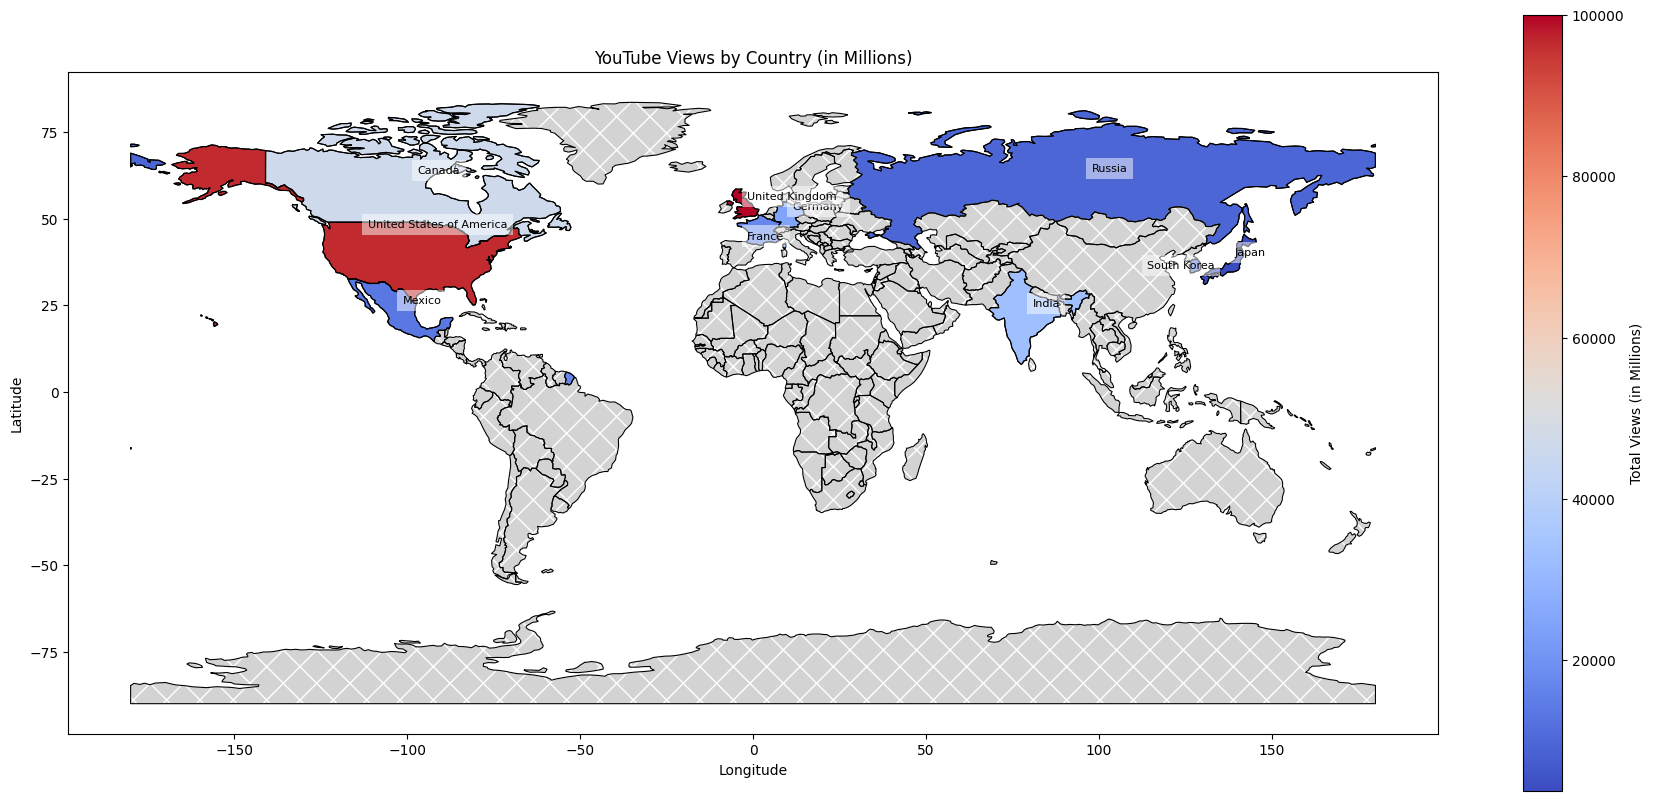

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize

# Read world map data
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Merge data and calculate total views for each country
views_sum = df.groupby('full_country')['views'].sum().reset_index()
world = world.merge(views_sum, left_on='ADMIN', right_on='full_country', how='left')

# Convert views to millions
world['views_million'] = world['views'] / 1_000_000

# Print each country and its total views, sorted in descending order of views
views_sum_sorted = views_sum.sort_values(by='views', ascending=False)
print(views_sum_sorted)

# Create figure and adjust size
fig, ax = plt.subplots(1, 1, figsize=(18, 10))  # Create axis object

# Define color mapping and normalization
cmap = plt.get_cmap('coolwarm')
vmin = world['views_million'].min()
vmax = 100_000  # Lower limit for the red section is adjusted to 100,000 million
norm = Normalize(vmin=vmin, vmax=vmax)

# Plot the countries' color fill and obtain mappable object
mappable = world.plot(column='views_million', cmap=cmap, linewidth=0.8, edgecolor='black', ax=ax, legend=False, missing_kwds={
    "color": "lightgrey",  # Countries with no data are colored light grey
    "edgecolor": "white",
    "hatch": "x",
}, norm=norm)

# Extract ScalarMappable object from Axes object
sm = None
for child in ax.get_children():
    if isinstance(child, plt.cm.ScalarMappable):
        sm = child
        break

# Add title and labels
plt.title('YouTube Views by Country (in Millions)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add color bar and set units, oriented vertically
cbar = plt.colorbar(sm, ax=ax, label='Total Views (in Millions)', orientation='vertical', shrink=0.8)

# Ensure boundary lines are clearly visible
world.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Add labels for all countries, offset upwards to avoid overlap
label_positions = set()  # Store label positions to avoid overlap
for idx, row in world.iterrows():
    if not pd.isna(row['full_country']):  # Check if full_country is not null
        centroid = row['geometry'].centroid
        # Fixed upward offset
        offset_y = 0.5  # Fixed upward offset
        # Calculate the new position after offset
        label_position = (centroid.x, centroid.y + offset_y)

        # Check if it overlaps with existing labels
        while label_position in label_positions:
            # Increase offset to avoid overlap
            offset_y += 0.3
            label_position = (centroid.x, centroid.y + offset_y)

        # Handle specific countries (e.g., South Korea and Japan)
        if row['ADMIN'] == 'South Korea':
            label_position = (centroid.x - 15.0, centroid.y - 2)  # Shift left
        elif row['ADMIN'] == 'Japan':
            label_position = (centroid.x, centroid.y + offset_y)  # Shift right

        label_positions.add(label_position)  # Add new position
        ax.annotate(text=row['ADMIN'], xy=label_position,
                    xytext=(3, 3), textcoords="offset points", fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.tight_layout()
plt.show()

### Insights

The world map graph above shows three tiers of countries based on total views of top-trending videos. The first tier has the highest views, including the US and UK. The second tier consists of Canada, India, France, and Germany, which have a moderate number of views. The third tier includes Mexico, Russia, South Korea, and Japan.

According to online research, India has the largest YouTube user population, followed by the US (1). This indicates that countries with more trending and highly viewed videos typically have larger audiences or population in general.

Additionally, high usage rates contribute to viewership. In the UK, YouTube was the leading platform for watching video content in 2022, with over 50% of users accessing it. In the US, children spend an average of 77 minutes per day on the YouTube mobile app, which can result in higher view counts. (2)

Lastly, YouTube is the dominant video platform in these countries and is viewed as a social media outlet, where users interact via comments and live streams. This allows creators and influencers to engage with audiences and monetize their content effectively. These support mechanisms can further boost popular videos and more high viewed videos.

Reference links:
1. https://sproutsocial.com/insights/youtube-stats/#:~:text=India%20has%20the%20largest%20YouTube,network's%20largest%20audience%20by%20country.
2. https://thesocialshepherd.com/blog/youtube-statistics#:~:text=Data%20from%202022%20shows%20that,on%20its%20mobile%20streaming%20platform.


### Sunburst Chart

*Tips: By clicking on the country name in the sunburst chart, the data for that country will be represented as 100%, showing the proportional distribution of different categories.*

In [ ]:
import plotly.express as px

# Group by country and category_title, and sum the views
sunburst_data = df.groupby(['full_country', 'category_title'])['views'].sum().reset_index()

# Function to get top 5 categories for each country
def get_top_categories(group):
    return group.nlargest(5, 'views')

# Apply the function to each country group
top_categories = sunburst_data.groupby('full_country').apply(get_top_categories).reset_index(drop=True)

# Create a Sunburst chart
fig = px.sunburst(top_categories, path=['full_country', 'category_title'], values='views',
                  color='views', color_continuous_scale='RdBu')

fig.update_layout(title='Sunburst Chart of Total Views by Country and Top 5 Categories')
fig.show()

<ipython-input-9-9afa598e55b3>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories = sunburst_data.groupby('full_country').apply(get_top_categories).reset_index(drop=True)


### Insights

Content preferences vary by country: music videos dominate in the U.S. and U.K., while entertainment videos are most popular in Canada, India, and Germany. However, overall, music and entertainment videos consistently receive the highest views globally. Existing or new Youtubers can choose their content category based on the current pattern.

To illustrate this, here are some example of most-viewed video categories by country:

UK: Music, Entertainment, Film & Animation, People & Blogs, Comedy
US: Music, Entertainment, Film & Animation, Comedy, People & Blogs
Canada: Entertainment, Music, Comedy, People & Blogs, Sports
India: Entertainment, Music, Film & Animation, Comedy, News & Politics
Germany: Entertainment, Music, People & Blogs, Sports, Film & Animation
Russia: Entertainment, People & Blog, Music, Comedy, News & Politics

In the UK, the music category dominates, suggesting that new or existing YouTubers aiming to gain views and attract audiences might focus on music-related content.

In the US, music also accounts for over half of the views, indicating that while music is a strong content choice, entertainment-related videos are also a good option for creators.

In Canada, India, and Germany, though music and entertainment hold a significant share of the views, each country has unique popular categories. For example:

In Canada, Comedy ranks third, making it a strong content option.
In India, Film & Animation performs well, while in Germany, People & Blogs ranks high.
For Japan, Sports content is a good focus area.
In Russia, Entertainment, People & Blogs, and Music have a relatively even distribution of views, allowing YouTubers more flexibility in choosing content that best suits their style.

## Question2: How do views in different YouTube categories trend over time, and how do these trends vary across countries? Additionally, we'll analyze any significant differences and determine which YouTube channels have the highest view counts within these categories.

### Trending vs Trending date

In [ ]:
import seaborn as sns

# Assume df is your DataFrame loaded with the dataset

# Group by 'full_country', 'category_title', and 'trending_date'
trending_data = df.groupby(['full_country', 'category_title', 'trending_date'])['views'].sum().reset_index()
countries = trending_data['full_country'].unique()

# Choose a color palette (uncomment one of the lines to use)
# colors = plt.cm.tab10.colors
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
colors = sns.color_palette("husl", 5)  # Requires seaborn
# colors = ['#0072B2', '#D55E00', '#009E73', '#CC79A7', '#F0E442']  # Contrast colors

# Plotting separately for each country
for country in countries:
    country_data = trending_data[trending_data['full_country'] == country]
    top_categories = country_data.groupby('category_title')['views'].sum().nlargest(5).index
    country_data = country_data[country_data['category_title'].isin(top_categories)]

    plt.figure(figsize=(14, 8))

    for i, category in enumerate(top_categories):
        category_data = country_data[country_data['category_title'] == category]
        plt.plot(
            category_data['trending_date'],
            category_data['views'] / 1_000_000,  # Convert views to millions
            label=category,
            color=colors[i],  # Set color from the selected palette
            alpha=0.7,
            linewidth=2,
            linestyle='-'
        )

    plt.title(f'Trending Views in {country}')
    plt.xlabel('Trending Date')
    plt.ylabel('Total Views (in millions)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

### Insights from Trending

From these graphs, we can observe that the x-axis represents the dates, while the y-axis represents the total number of views. The curves depicted correspond to the trends over time for different categories. It is evident that most categories exhibit significant fluctuations over time, with entertainment and music categories displaying notable peaks and troughs. These variations may be related to periodic trends, such as specific music or entertainment events enjoying a strong association. In several countries, such as Japan, these graphs illustrate pronounced sharp peaks and troughs, indicating that these periodic trends are fleeting.

From these observations, we can offer several recommendations for content creation: while the trend patterns for most categories are challenging to predict, many periodic trends emerge over time. We need to pay attention to activities within relevant categories, and when such activities show signs of gaining traction, we must seize the opportunity to create content. If we miss this window of opportunity, we may lose the chance to attract greater attention.

Additionally, we found an intriguing phenomenon in the United States and the United Kingdom: the music category showed strong momentum after February 2018 and has not faded significantly over an extended period. This piqued our curiosity regarding which channels produced notably popular YouTube content during this time.

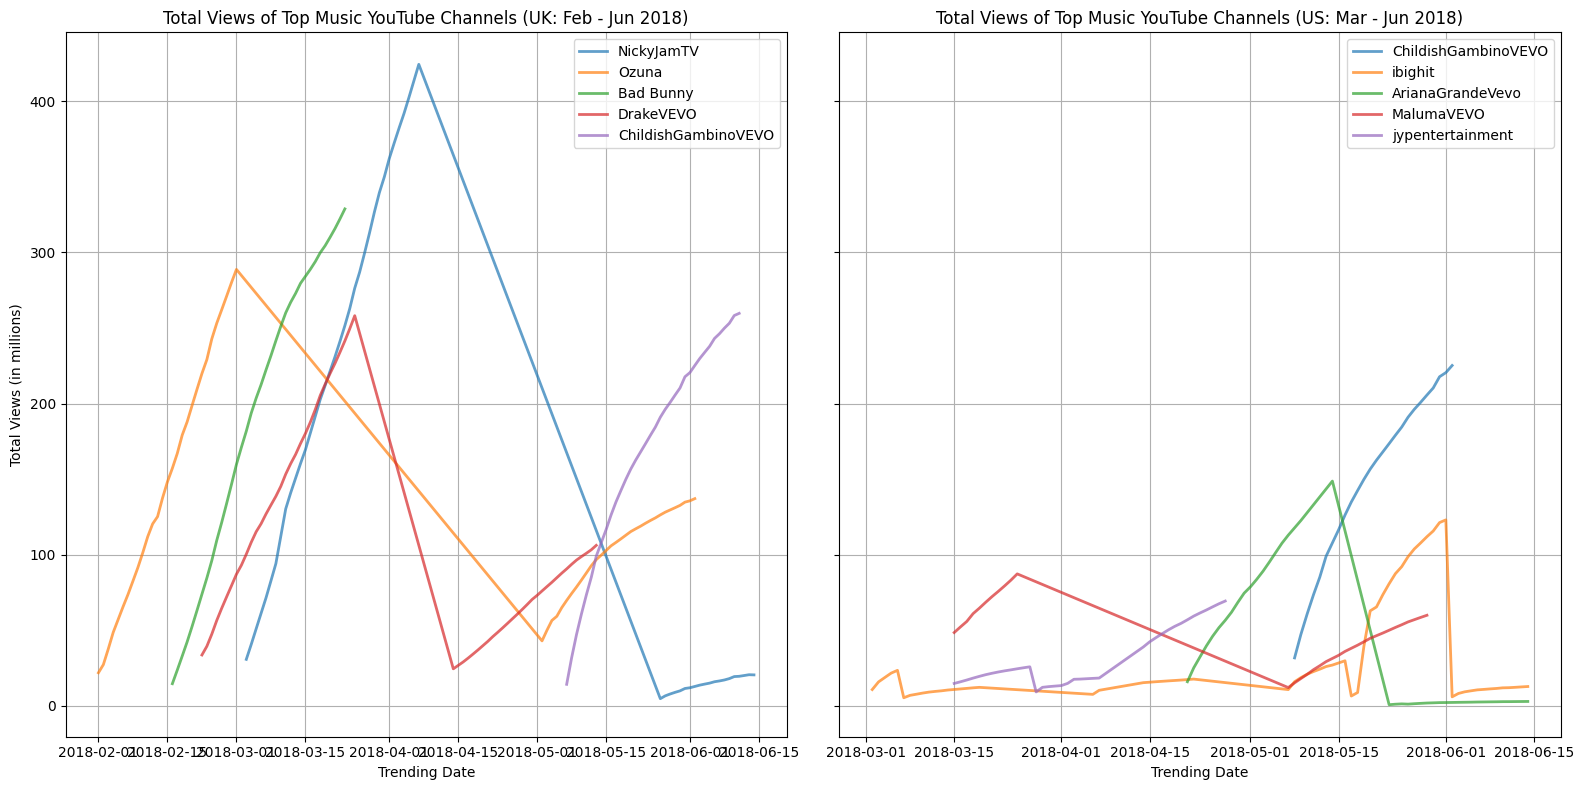

Top UK Music Channels (Feb-Jun 2018):
channel_title
Bad Bunny              6.891281e+09
ChildishGambinoVEVO    5.984728e+09
DrakeVEVO              6.581834e+09
NickyJamTV             8.516190e+09
Ozuna                  7.563453e+09
Name: views, dtype: float64

Top US Music Channels (Mar-Jun 2018):
channel_title
ArianaGrandeVevo       1.576959e+09
ChildishGambinoVEVO    3.758489e+09
MalumaVEVO             1.551516e+09
ibighit                2.011897e+09
jypentertainment       1.210680e+09
Name: views, dtype: float64


In [ ]:
# Convert trending_date to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Filter data for the specific time ranges and countries
uk_data = df[(df['full_country'] == 'United Kingdom') & (df['trending_date'] >= '2018-02-01') & (df['trending_date'] <= '2018-06-30')]
us_data = df[(df['full_country'] == 'United States of America') & (df['trending_date'] >= '2018-03-01') & (df['trending_date'] <= '2018-06-30')]

# Filter data for the 'Music' category during the time range
uk_music_data = uk_data[uk_data['category_title'] == 'Music']
us_music_data = us_data[us_data['category_title'] == 'Music']

# music channels: total views in the specified time range
uk_music_channels = uk_music_data.groupby('channel_title')['views'].sum().nlargest(5).index
us_music_channels = us_music_data.groupby('channel_title')['views'].sum().nlargest(5).index

# plot views of top music channels
def plot_top_music_channels(uk_music_data, us_music_data, uk_music_channels, us_music_channels):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)

    # UK
    for channel in uk_music_channels:
        channel_data = uk_music_data[uk_music_data['channel_title'] == channel]
        axes[0].plot(
            channel_data['trending_date'],
            channel_data['views'] / 1_000_000,  # Convert views to millions
            label=f'{channel}',
            alpha=0.7,
            linewidth=2)

    axes[0].set_title('Total Views of Top Music YouTube Channels (UK: Feb - Jun 2018)')
    axes[0].set_xlabel('Trending Date')
    axes[0].set_ylabel('Total Views (in millions)')
    axes[0].legend()
    axes[0].grid(True)

    # US
    for channel in us_music_channels:
        channel_data = us_music_data[us_music_data['channel_title'] == channel]
        axes[1].plot(
            channel_data['trending_date'],
            channel_data['views'] / 1_000_000,
            label=f'{channel}',
            alpha=0.7,
            linewidth=2)
    axes[1].set_title('Total Views of Top Music YouTube Channels (US: Mar - Jun 2018)')
    axes[1].set_xlabel('Trending Date')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_top_music_channels(uk_music_data, us_music_data, uk_music_channels, us_music_channels)

print("Top UK Music Channels (Feb-Jun 2018):")
print(uk_music_data[uk_music_data['channel_title'].isin(uk_music_channels)].groupby('channel_title')['views'].sum())

print("\nTop US Music Channels (Mar-Jun 2018):")
print(us_music_data[us_music_data['channel_title'].isin(us_music_channels)].groupby('channel_title')['views'].sum())


### Insights about music category:

From the graphs above, it shows that there's a competition among YouTubers within the same category. Specifically in the UK, an increase in views for one YouTuber tends to decrease views for others in the same space. However, it is worth noting that all YouTubers experienced peak viewership during this time.

To be more detailed, we discovered that creators such as Bad Bunny, Drake, and Ariana Grande dominated the music market's attention in the UK and the US. If we consider entering the music creation space, we might draw insights from their successful experiences. It will also be interesting to see what content was produced during this period that contributed to such high view counts. It could also be beneficial to analyze external factors, such as the debut of popular songs, singers, or artists, which may have driven increased interest in the music category during this time frame.

### Trending vs Duration

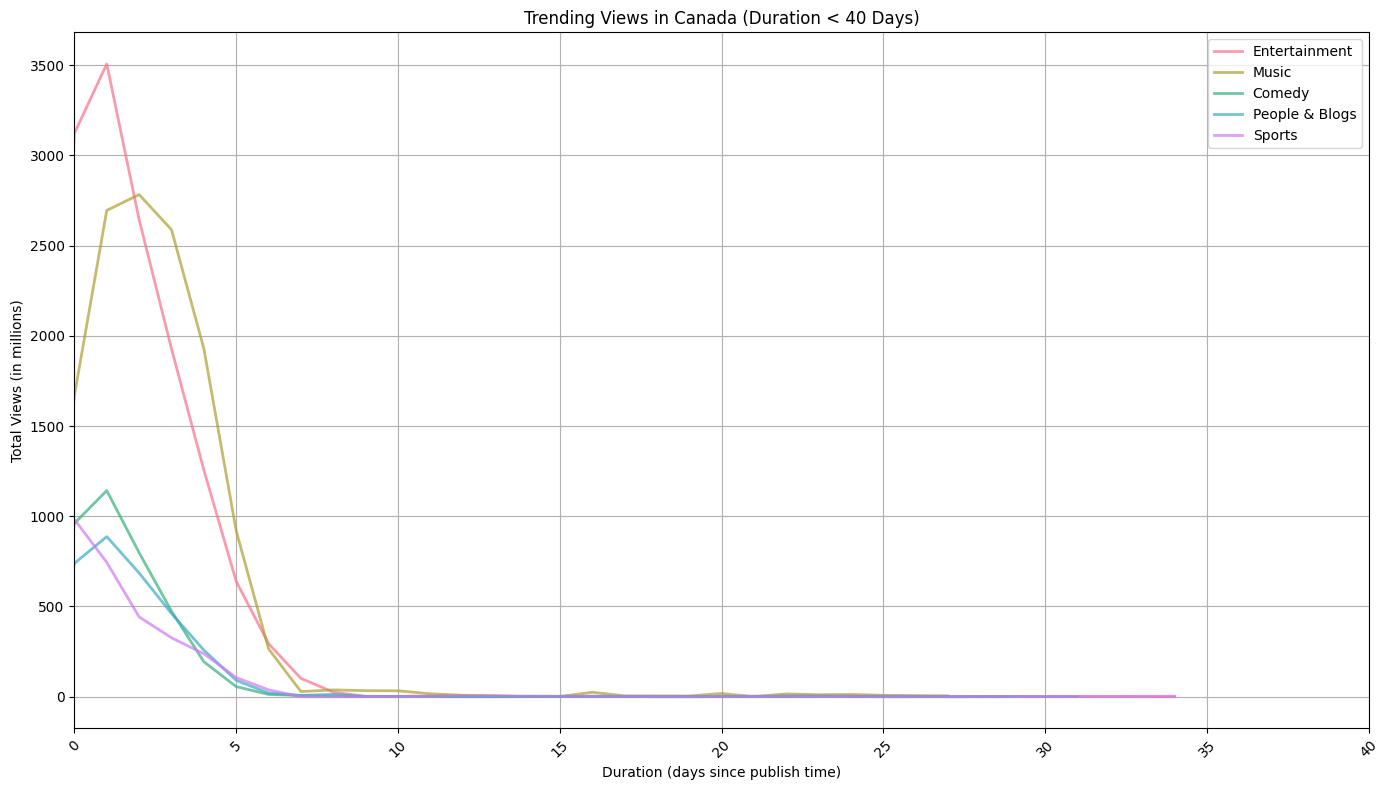

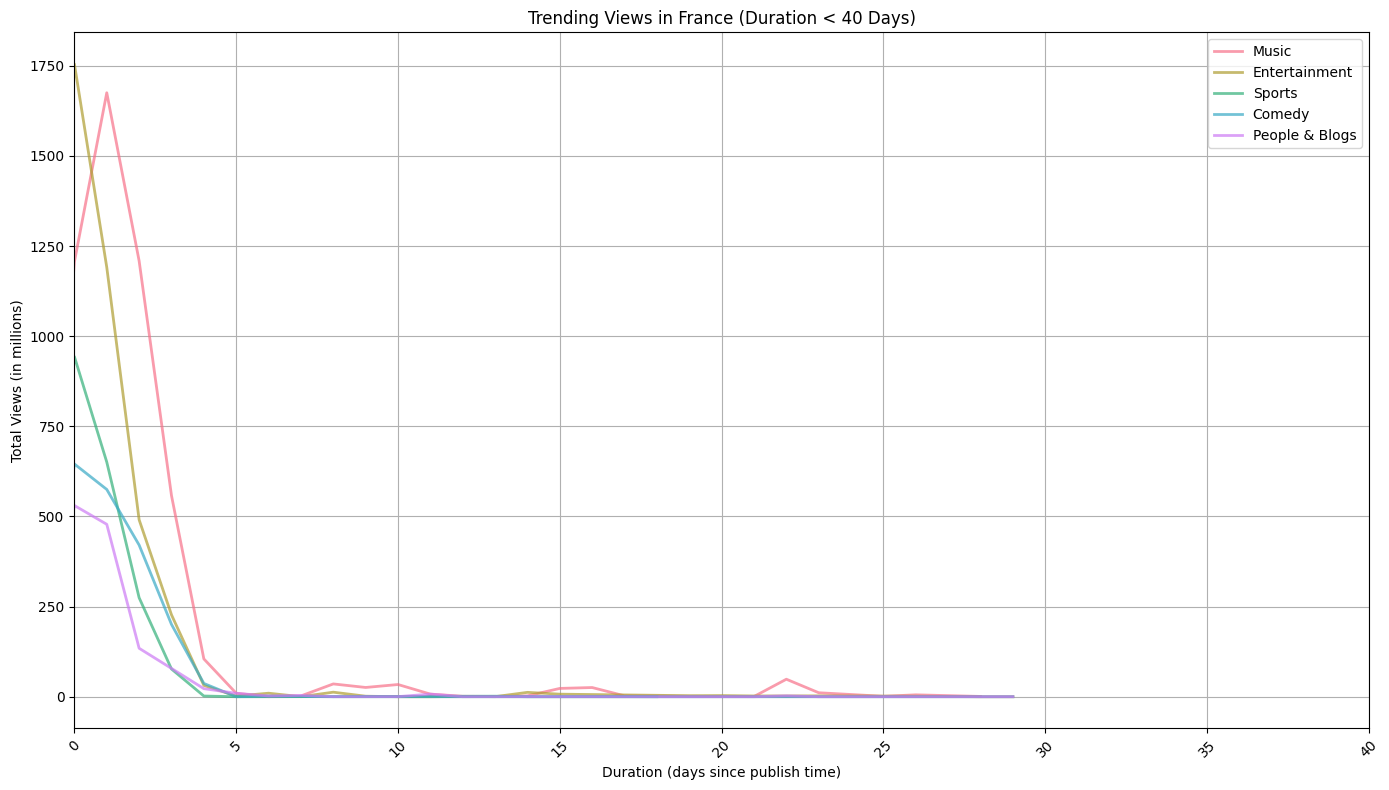

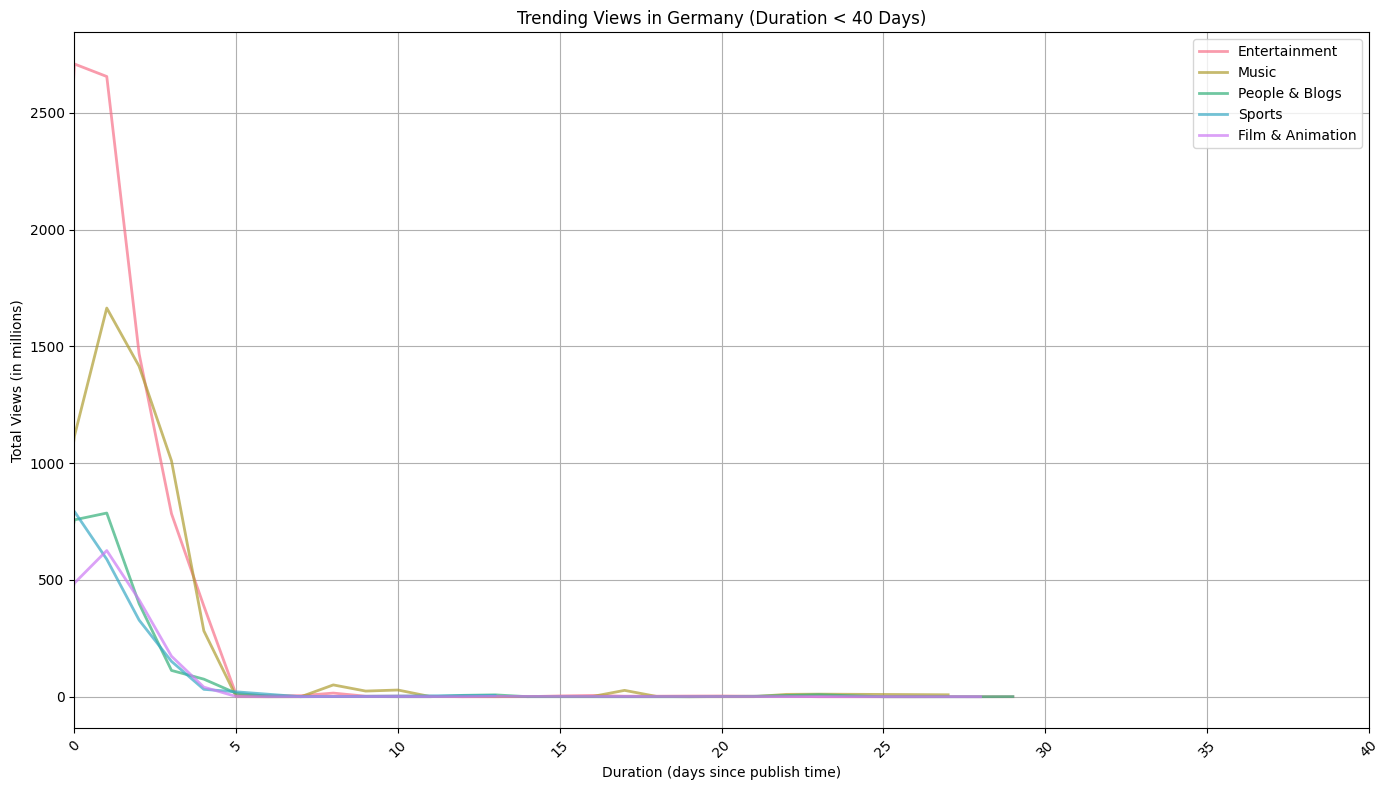

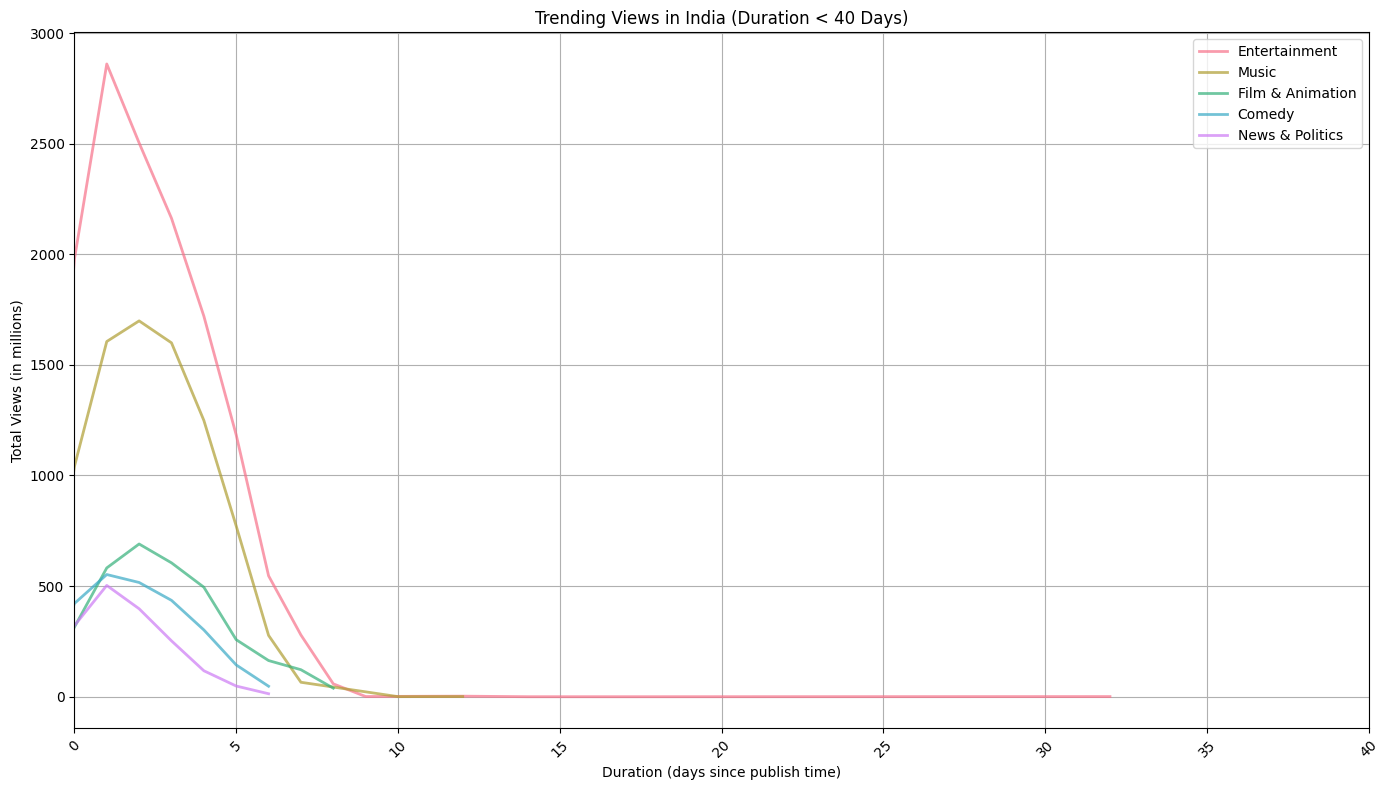

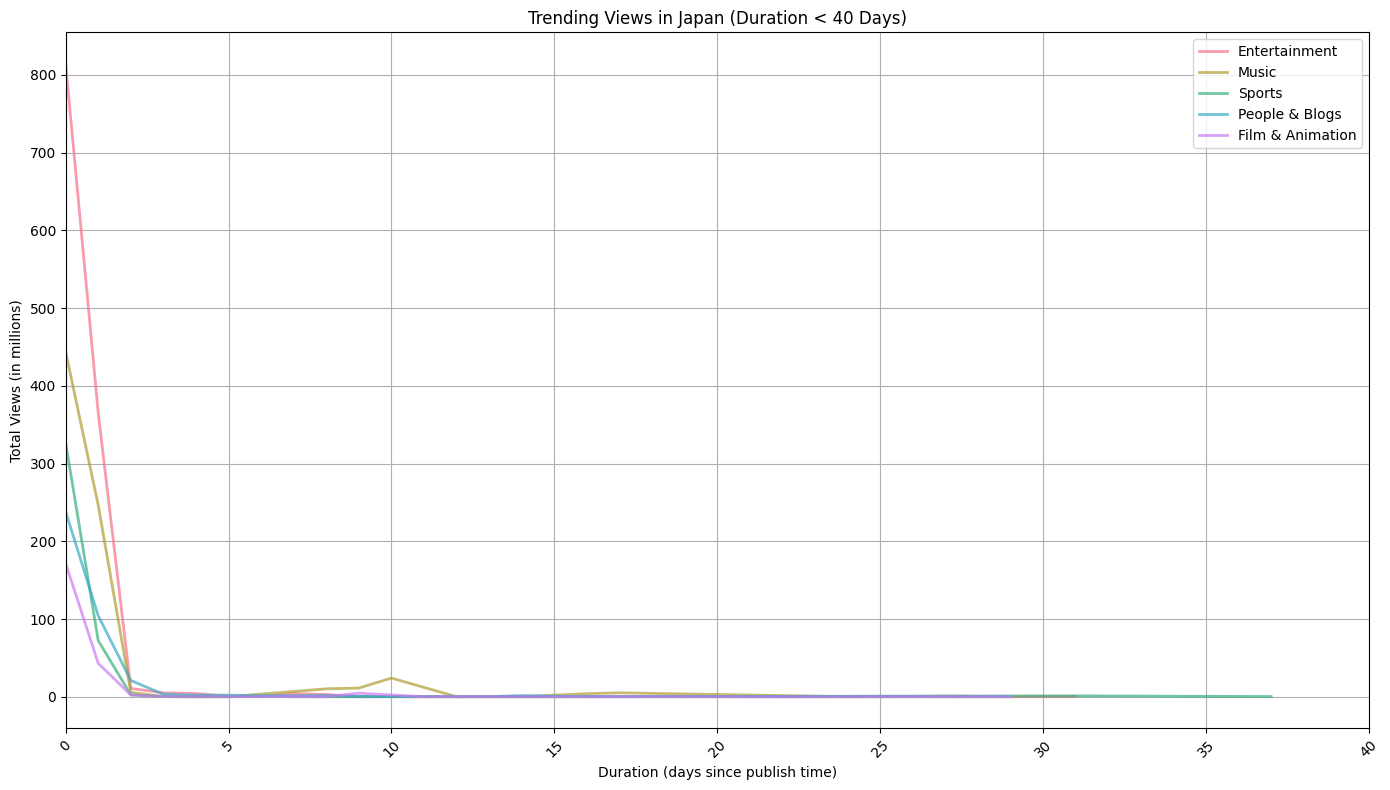

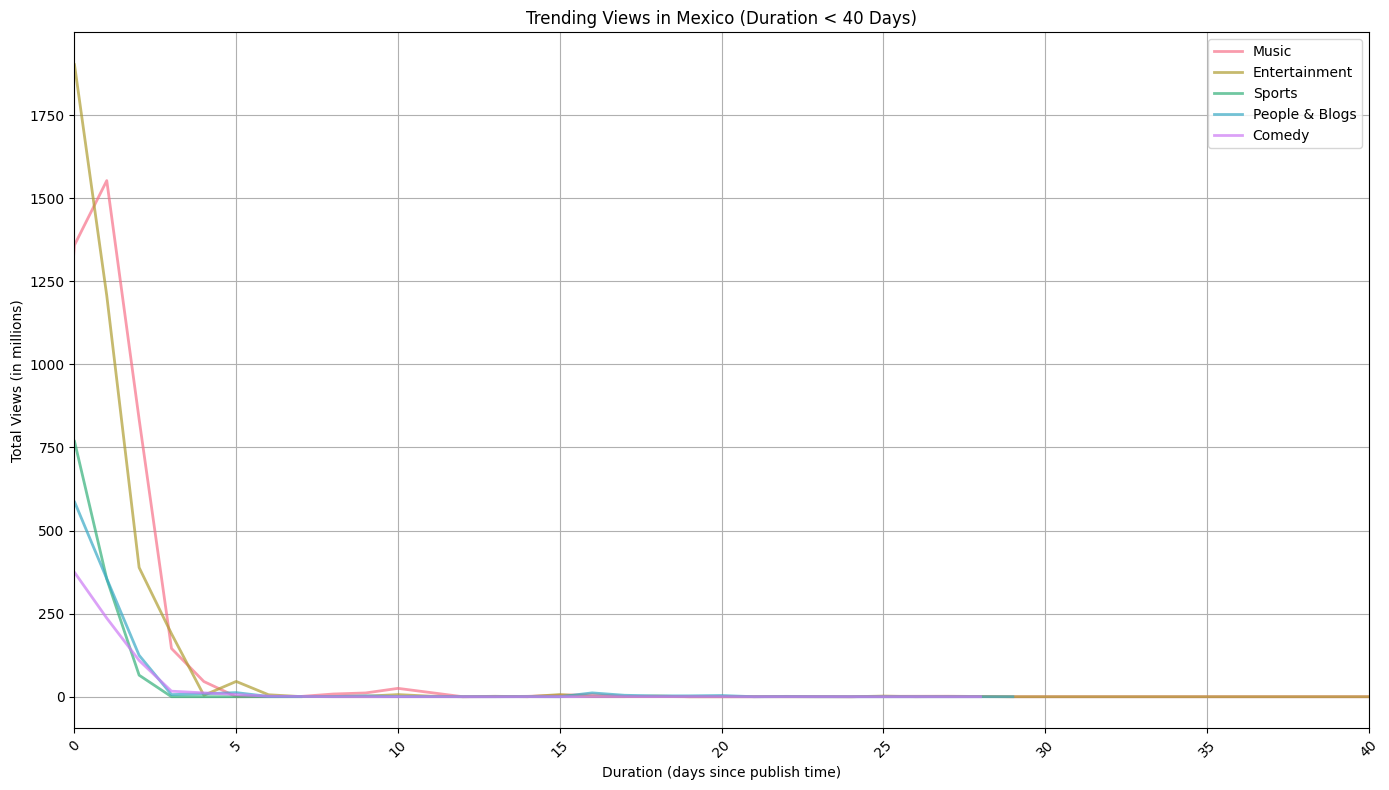

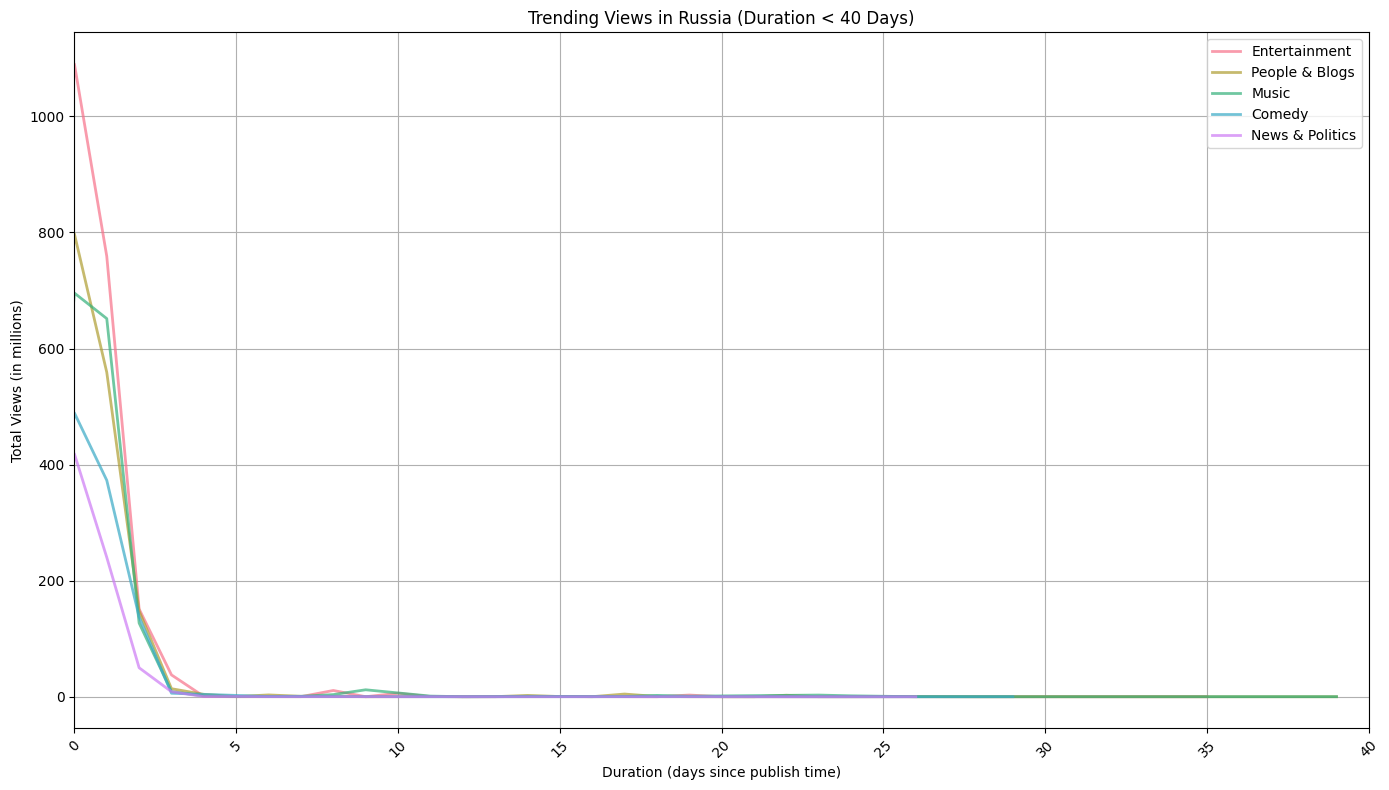

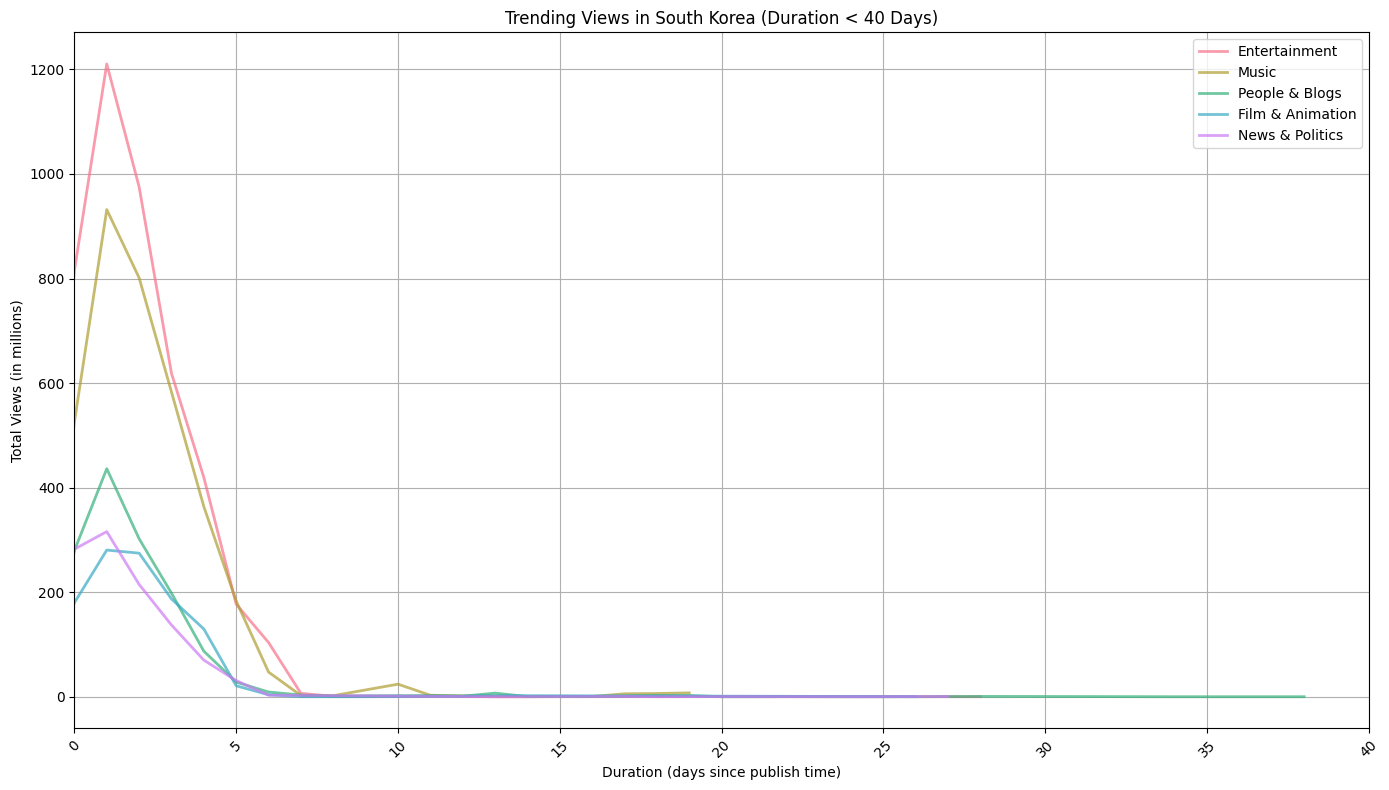

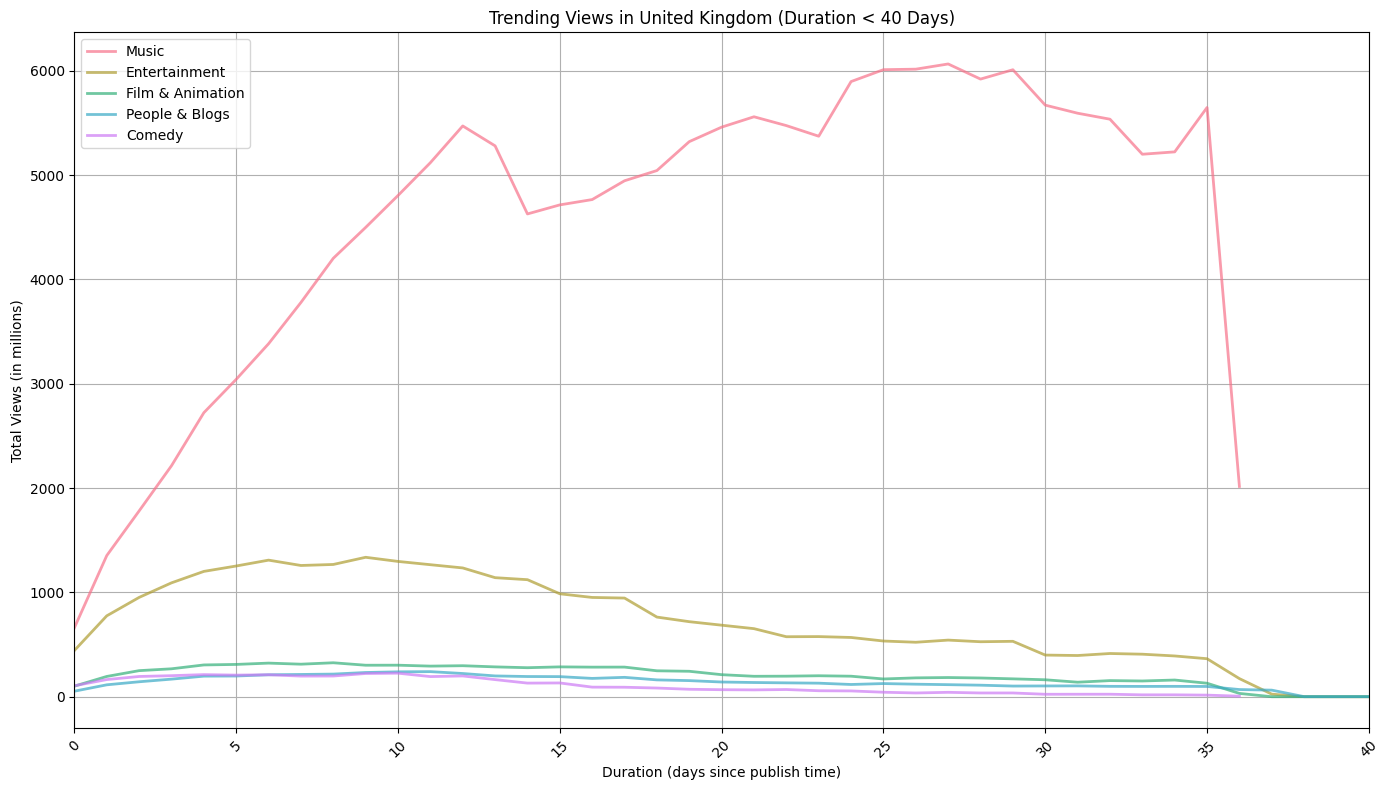

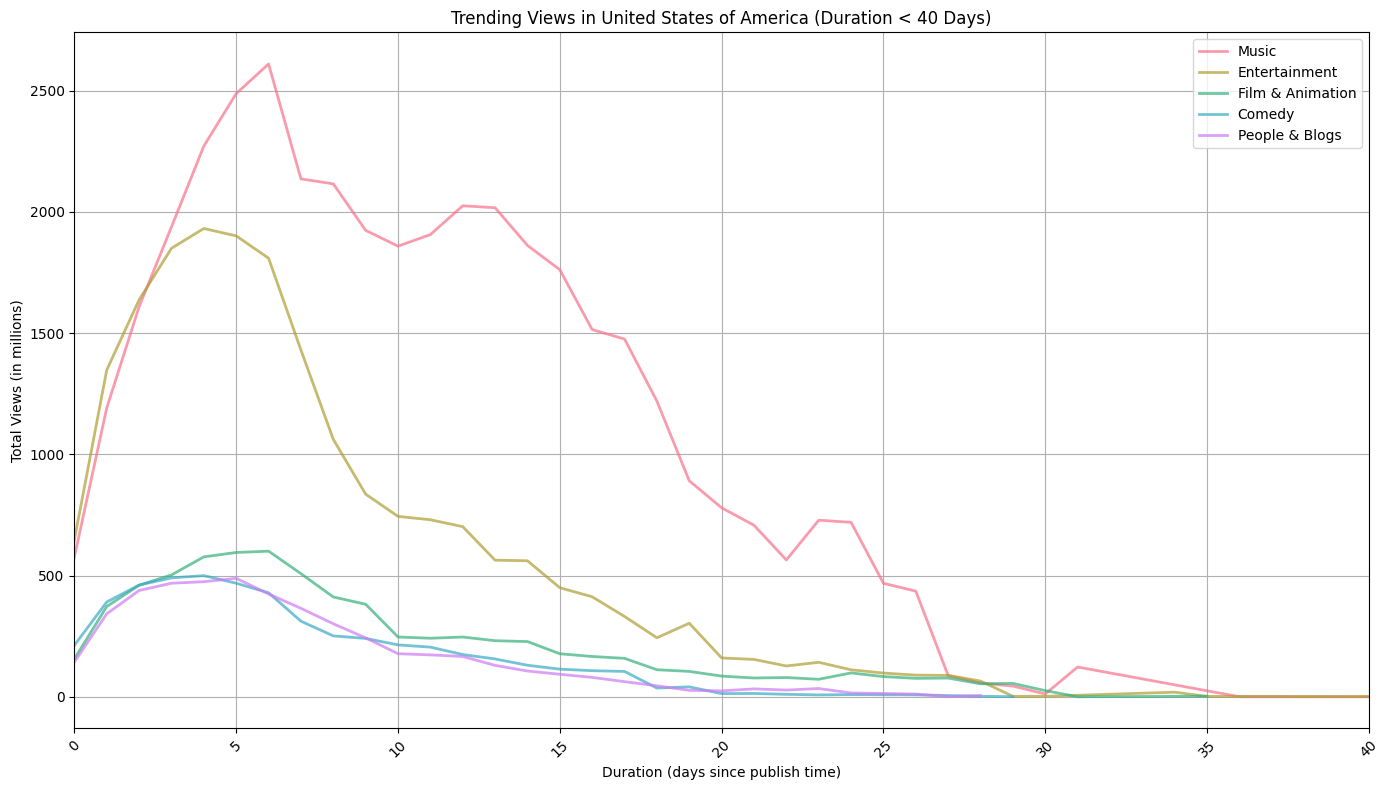

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert columns to datetime if not already in datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Calculate duration (in days)
df['duration'] = (df['trending_date'] - df['publish_time']).dt.days

# Group by 'full_country', 'category_title', and 'duration'
trending_data = df.groupby(['full_country', 'category_title', 'duration'])['views'].sum().reset_index()

# Filter for duration <= 40 days
trending_data = trending_data[trending_data['duration'] <= 40]

countries = trending_data['full_country'].unique()

# Choose a color palette
colors = sns.color_palette("husl", 5)  # Requires seaborn

# Plotting separately for each country
for country in countries:
    country_data = trending_data[trending_data['full_country'] == country]
    top_categories = country_data.groupby('category_title')['views'].sum().nlargest(5).index
    country_data = country_data[country_data['category_title'].isin(top_categories)]

    plt.figure(figsize=(14, 8))

    for i, category in enumerate(top_categories):
        category_data = country_data[country_data['category_title'] == category]
        plt.plot(
            category_data['duration'],
            category_data['views'] / 1_000_000,  # Convert views to millions
            label=category,
            color=colors[i % len(colors)],  # Ensure color indexing works if categories exceed number of colors
            alpha=0.7,
            linewidth=2,
            linestyle='-'
        )

    plt.title(f'Trending Views in {country} (Duration < 40 Days)')
    plt.xlabel('Duration (days since publish time)')
    plt.ylabel('Total Views (in millions)')
    plt.legend()
    plt.xlim(0, 40)  # Set x-axis limit to 30 days
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Insights

Different countries exhibit similar trends, with view counts rapidly peaking in the days following a video's release, followed by a sharp decline over the subsequent days. This indicates that short-term audience engagement with new content is a common phenomenon.

However, this trend also varies across countries. In most countries, view counts typically drop significantly within 5 to 10 days, while in the UK and the US, music and entertainment categories show strong momentum over a longer period (25 to 35 days).

In terms of category analysis, music and entertainment content consistently leads in view counts across all countries, demonstrating their universal effectiveness in attracting viewers. At the same time, cultural differences across nations can influence audience preferences.

Specifically, in the UK, music content far exceeds other categories, reaching 60 million views, highlighting its immense appeal among British audiences. The view counts for entertainment videos are also relatively high, indicating a broad acceptance of diverse content. In the US, overall view counts are higher, particularly for music and entertainment videos, which can reach up to 25 million, showcasing the strong ability of these categories to capture audience interest. Additionally, compared to other countries, the decline in views in the US is slower, suggesting a longer-term interest in certain content.

How does this affect our decision-making as content creators? As YouTubers and marketers, we should tailor our content strategies according to the preferences of audiences in different countries to maximize view counts and audience engagement. More specifically, in most countries (excluding the UK and US), marketing and promotional strategies should be implemented within 5 to 10 days following a video's release. However, for music-related content produced in the UK and US, the promotional period can be extended to around 20 days.

## Question3: How do publish details such as posting time (specific time of day and day of the week), and video titles affect YouTube view counts, and what recommendations can be provided based on these findings?

### Analyze Views Based on Publish Day

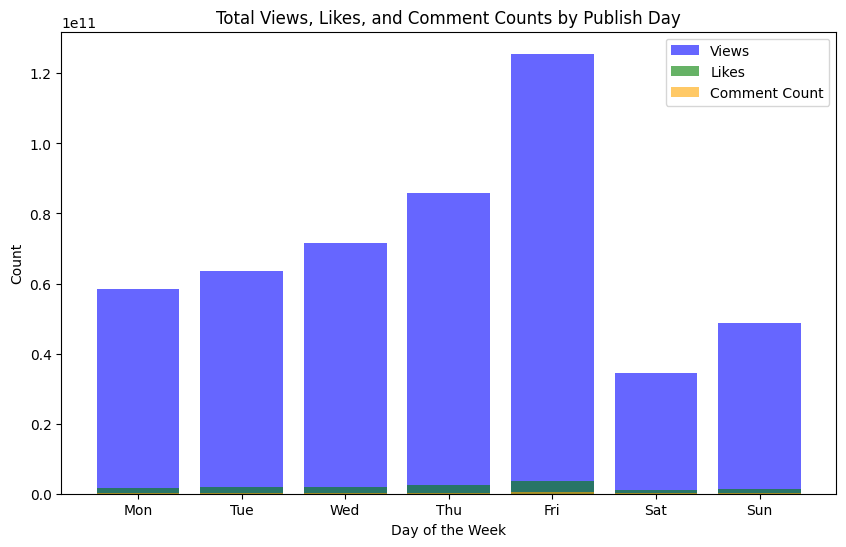

In [ ]:
# Extract the day of the week (0 = Monday, 6 = Sunday)
df['publish_day'] = df['publish_time'].dt.dayofweek

# Group by day of the week and calculate the sum of views, likes, and comment counts
day_analysis = df.groupby('publish_day')[['views', 'likes', 'comment_count']].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(day_analysis['publish_day'], day_analysis['views'], label='Views', color='blue', alpha=0.6)
plt.bar(day_analysis['publish_day'], day_analysis['likes'], label='Likes', color='green', alpha=0.6)
plt.bar(day_analysis['publish_day'], day_analysis['comment_count'], label='Comment Count', color='orange', alpha=0.6)

plt.xticks(day_analysis['publish_day'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Total Views, Likes, and Comment Counts by Publish Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend()
plt.show()


From a broader perspective, regardless of the country, Friday emerges as an ideal day for content release, potentially leading to higher view counts.


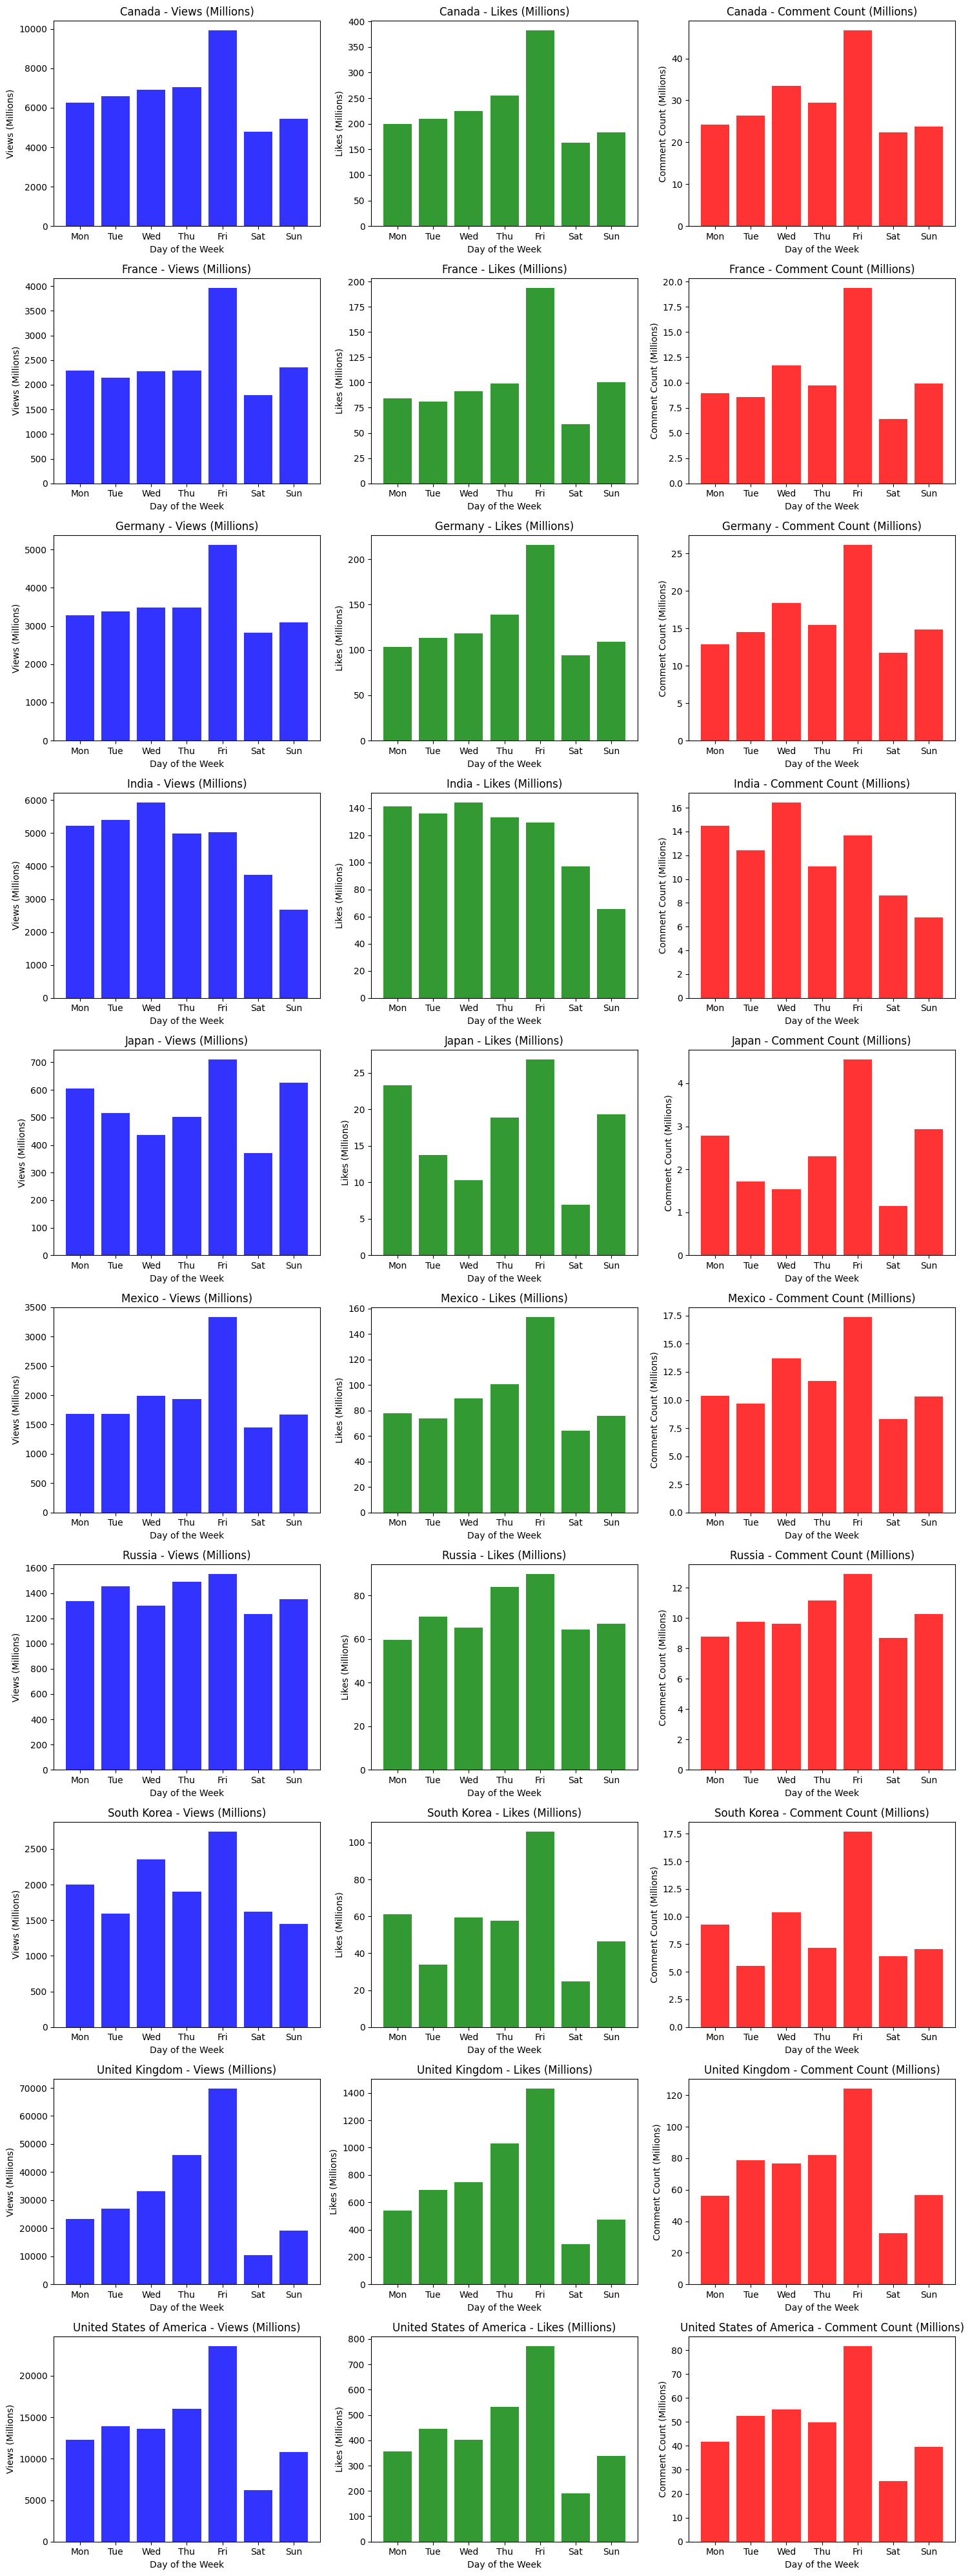

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['publish_day'] = df['publish_time'].dt.dayofweek

# Group by full_country and day of the week, then calculate the sum of views, likes, and comment counts
country_day_analysis = df.groupby(['full_country', 'publish_day'])[['views', 'likes', 'comment_count']].sum().reset_index()

# List of countries to plot
countries = country_day_analysis['full_country'].unique()[:10]

# Create a 10x3 grid of subplots
fig, axes = plt.subplots(10, 3, figsize=(15, 40))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each country and plot the data
for i, country in enumerate(countries):
    country_data = country_day_analysis[country_day_analysis['full_country'] == country]

    # Plot views
    axes[i*3].bar(country_data['publish_day'], country_data['views'] / 1e6, color='blue', alpha=0.8)
    axes[i*3].set_title(f'{country} - Views (Millions)')
    axes[i*3].set_xlabel('Day of the Week')
    axes[i*3].set_ylabel('Views (Millions)')
    axes[i*3].set_xticks(country_data['publish_day'])
    axes[i*3].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

    # Plot likes
    axes[i*3 + 1].bar(country_data['publish_day'], country_data['likes'] / 1e6, color='green', alpha=0.8)
    axes[i*3 + 1].set_title(f'{country} - Likes (Millions)')
    axes[i*3 + 1].set_xlabel('Day of the Week')
    axes[i*3 + 1].set_ylabel('Likes (Millions)')
    axes[i*3 + 1].set_xticks(country_data['publish_day'])
    axes[i*3 + 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

    # Plot comment counts
    axes[i*3 + 2].bar(country_data['publish_day'], country_data['comment_count'] / 1e6, color='red', alpha=0.8)
    axes[i*3 + 2].set_title(f'{country} - Comment Count (Millions)')
    axes[i*3 + 2].set_xlabel('Day of the Week')
    axes[i*3 + 2].set_ylabel('Comment Count (Millions)')
    axes[i*3 + 2].set_xticks(country_data['publish_day'])
    axes[i*3 + 2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout
plt.tight_layout()
plt.show()

Further analysis reveals how views, likes, and comments fluctuate on different days within the week. Interestingly, different countries exhibit varying trends. In India, it seems that releasing content on Wednesday can yield higher views, with weekdays (Monday to Friday) maintaining higher view levels compared to weekends. However, in countries like South Korea, the United States, and Russia, releasing on Friday is more advantageous.

### Analyze Views Based on Publishing time (hour)

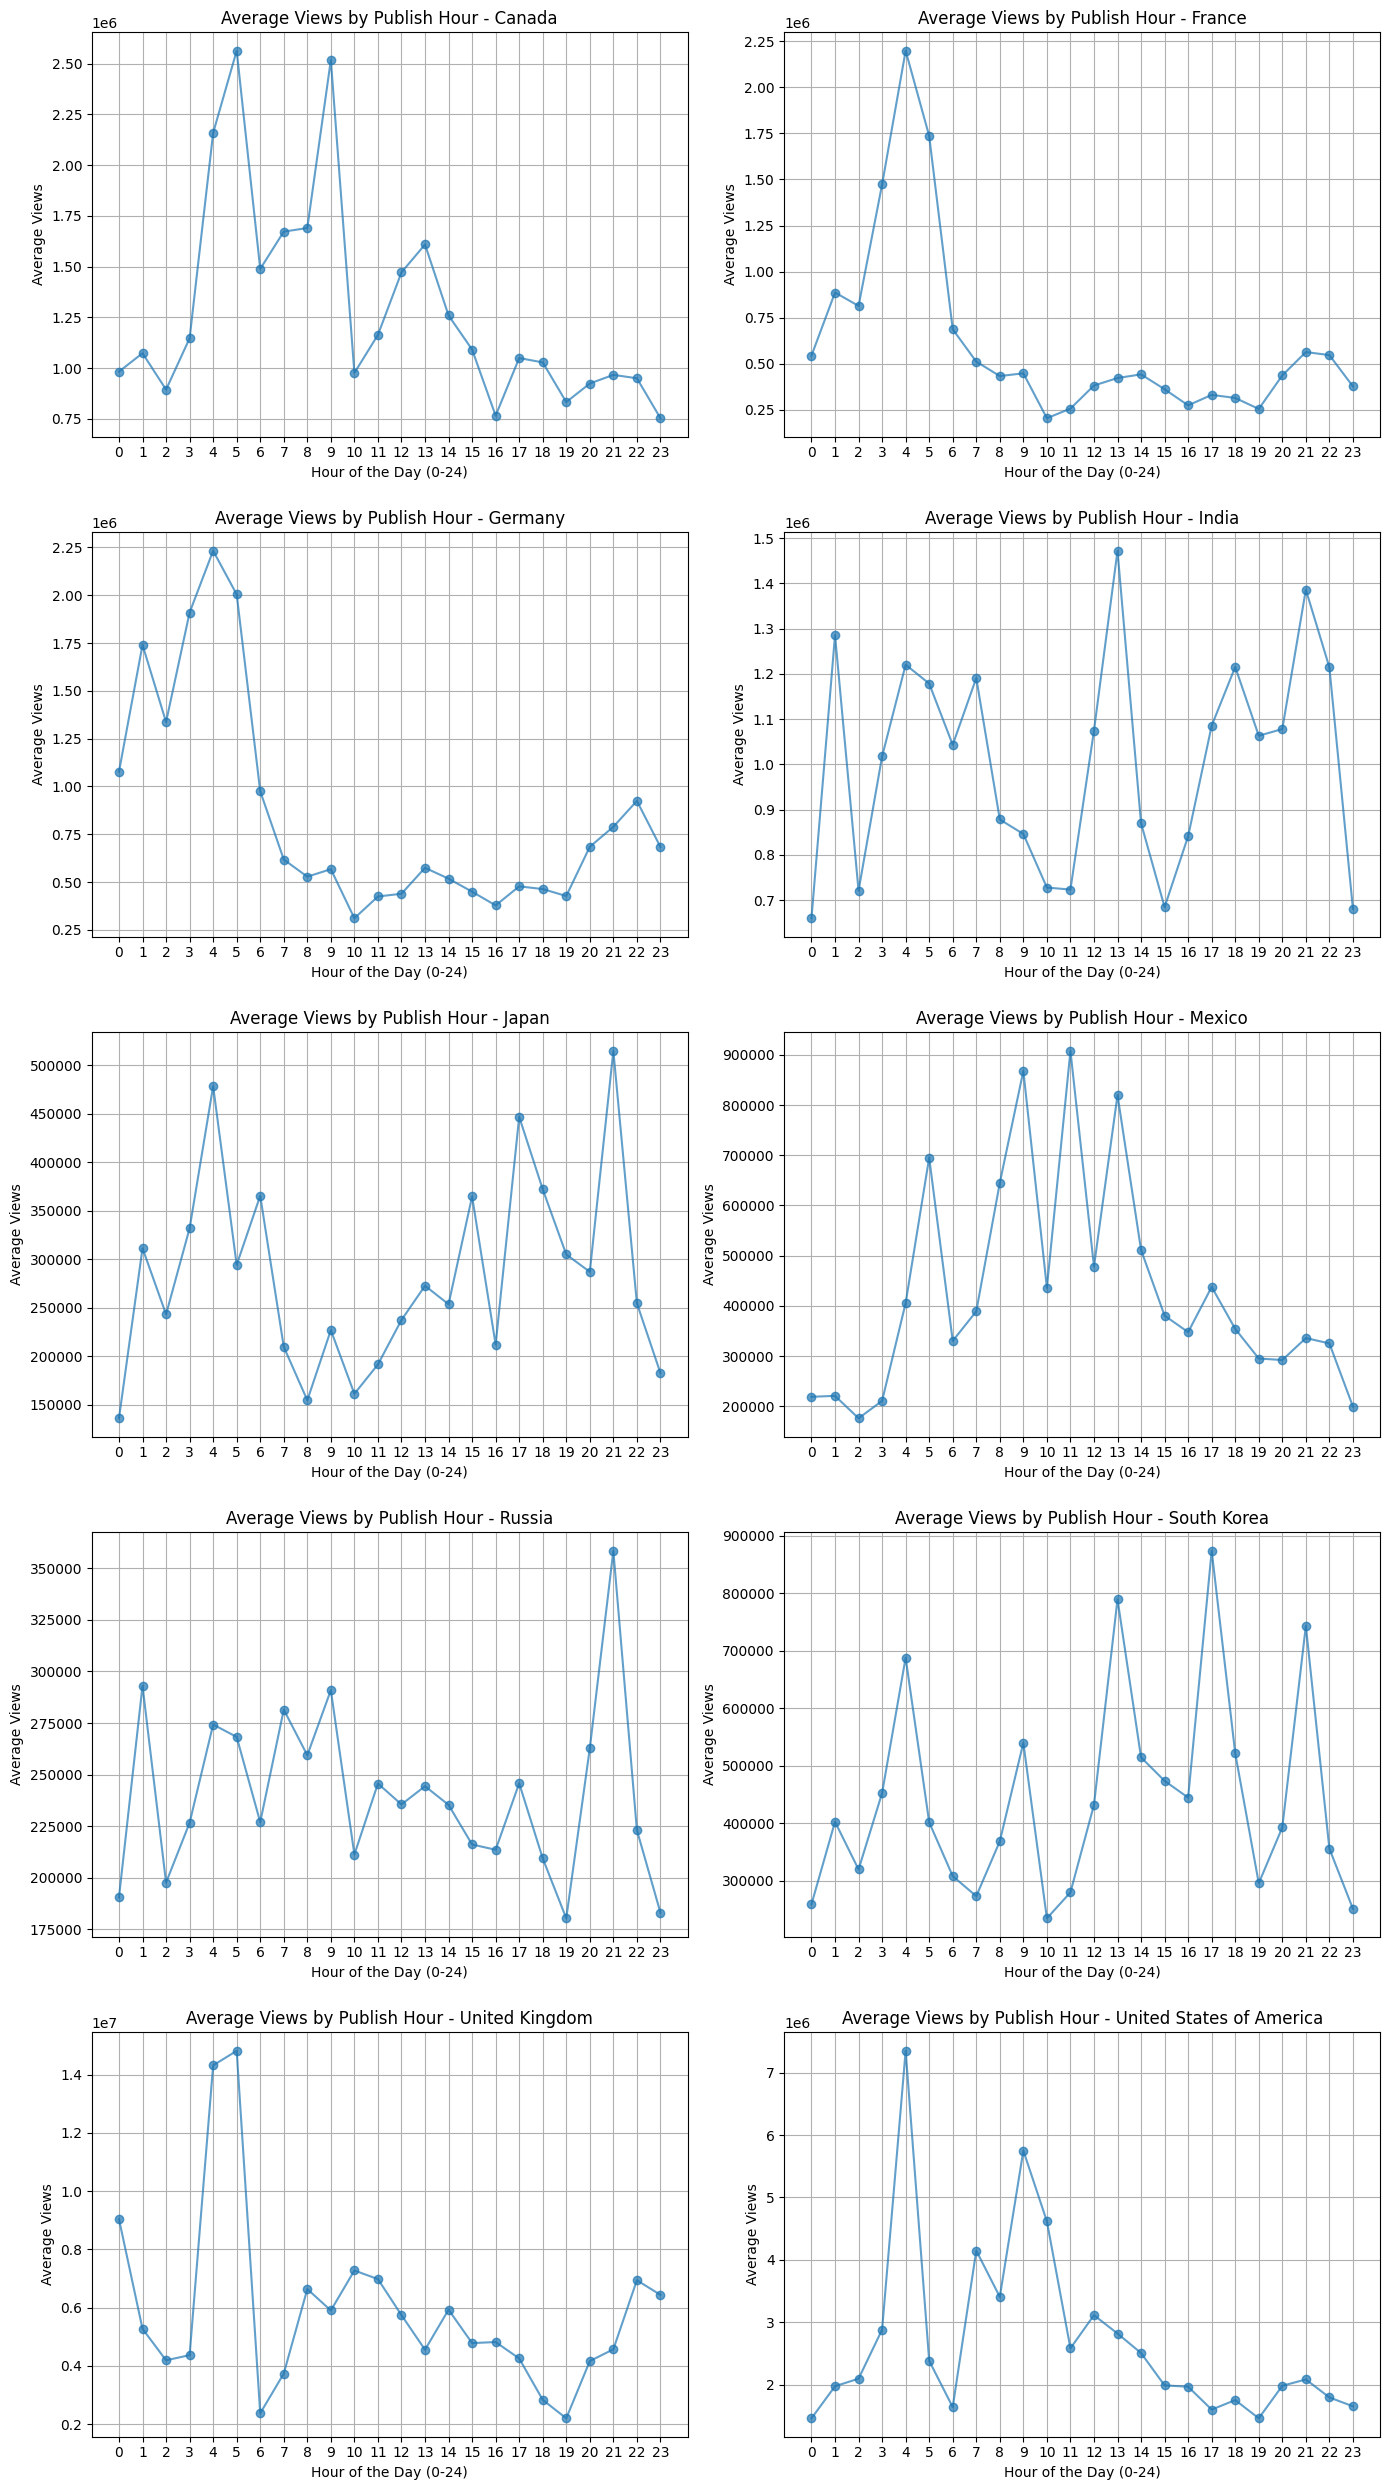

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Extract the hour from the publish time
df['publish_hour'] = df['publish_time'].dt.hour

# Group by country and hour, calculate the average views
hourly_analysis = df.groupby(['full_country', 'publish_hour']).agg({'views': 'mean'}).reset_index()

# Get unique countries
countries = hourly_analysis['full_country'].unique()

# Set up the subplots with 5 rows and 2 columns
num_countries = len(countries)
rows = (num_countries // 2) + (num_countries % 2)
fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, country in enumerate(countries):
    country_data = hourly_analysis[hourly_analysis['full_country'] == country]

    axes[i].plot(country_data['publish_hour'], country_data['views'], marker='o', alpha=0.7)
    axes[i].set_title(f'Average Views by Publish Hour - {country}')
    axes[i].set_xlabel('Hour of the Day (0-24)')
    axes[i].set_ylabel('Average Views')
    axes[i].set_xticks(range(0, 24))
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In a similar vein, we examined how the time of day affects view counts. Each country exhibits its own unique patterns. For instance, publishing content in the early morning appears to yield higher view counts in countries like Canada, France, Germany, the UK, and the USA. Conversely, in countries such as India, Japan, and South Korea, releasing content during specific times in the afternoon and evening seems to be a better strategy. Therefore, you can determine the optimal time for your video releases based on the characteristics of the country you are targeting.

### Analyze Views Based on Title Length

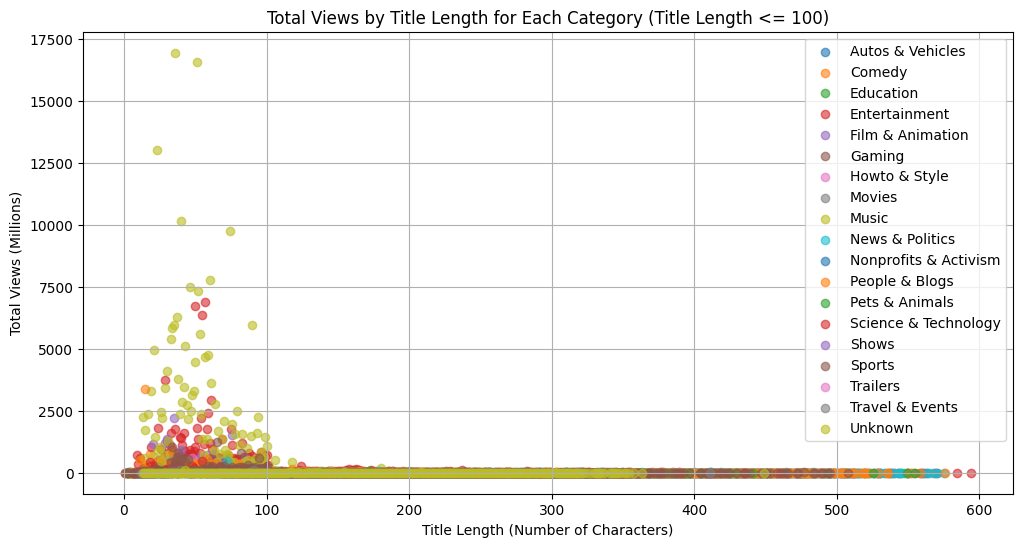

In [ ]:
# Add a new column for title length
df['title_length'] = df['title'].apply(len)

# Filter titles with length <= 100
# df = df[df['title_length'] <= 100]

# Group by category and title length, then sum the views
length_analysis = df.groupby(['category_title', 'title_length'])['views'].sum().reset_index()

# Convert views to millions
length_analysis['views_million'] = length_analysis['views'] / 1_000_000

# Create a scatter plot
plt.figure(figsize=(12, 6))
for category in length_analysis['category_title'].unique():
    category_data = length_analysis[length_analysis['category_title'] == category]
    plt.scatter(category_data['title_length'], category_data['views_million'], label=category, alpha=0.6)

plt.title('Total Views by Title Length for Each Category (Title Length <= 100)')
plt.xlabel('Title Length (Number of Characters)')
plt.ylabel('Total Views (Millions)')
plt.legend()
plt.grid(True)
plt.show()

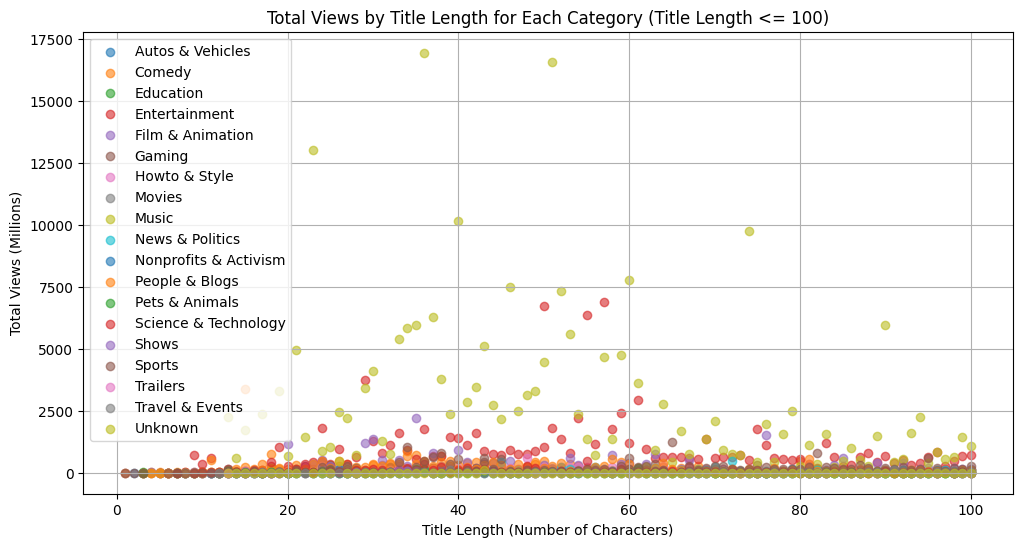

In [ ]:
# Add a new column for title length
df['title_length'] = df['title'].apply(len)

# Filter titles with length <= 100
df = df[df['title_length'] <= 100]

# Group by category and title length, then sum the views
length_analysis = df.groupby(['category_title', 'title_length'])['views'].sum().reset_index()

# Convert views to millions
length_analysis['views_million'] = length_analysis['views'] / 1_000_000

# Create a scatter plot
plt.figure(figsize=(12, 6))
for category in length_analysis['category_title'].unique():
    category_data = length_analysis[length_analysis['category_title'] == category]
    plt.scatter(category_data['title_length'], category_data['views_million'], label=category, alpha=0.6)

plt.title('Total Views by Title Length for Each Category (Title Length <= 100)')
plt.xlabel('Title Length (Number of Characters)')
plt.ylabel('Total Views (Millions)')
plt.legend()
plt.grid(True)
plt.show()


Moreover, we analyzed how title length affects view counts. The data indicates that titles within the range of 30 to 70 characters tend to be more successful. We strongly advise against using titles longer than 100 characters, as view counts seem to significantly decrease beyond this length.